# Long Short Term Memory (LSTM) deep learning model for time series prediction

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

**Importing 'LSTM' class**

In [2]:
from script.deep_learning import LSTM

**Instantiate the the class**

In [3]:
modelling=LSTM()

**Loading the csv data to a pandas dataframe**

In [4]:
train_df=pd.read_csv("data\\train.csv",low_memory=False)

In [5]:
train_df=train_df.drop(train_df.index[200000:])

### **Isolate Time Series Data:**
Extract relevant columns (e.g., Date, Sales) and structure the data in a time series format.

In [6]:
time_series_data = modelling.isolate_time_series(train_df)

2024-09-24 22:21:36,738 - INFO - isolate time series data


### **Check for Stationarity:** 
Use statistical tests like the Augmented Dickey-Fuller (ADF) test to assess whether the time series data is stationary.

In [7]:
modelling.check_stationarity(time_series_data['Sales'])

2024-09-24 22:21:36,923 - INFO - check if it is stationary or not


ADF Statistic: -10.34544092138812
p-value: 2.618443037799304e-18
The time series is stationary.


### **Check for Autocorrelation:** 
Plot autocorrelation (ACF) and partial autocorrelation (PACF) to understand lag dependencies in the data.

2024-09-24 22:24:17,617 - INFO - plot ACF and PACF


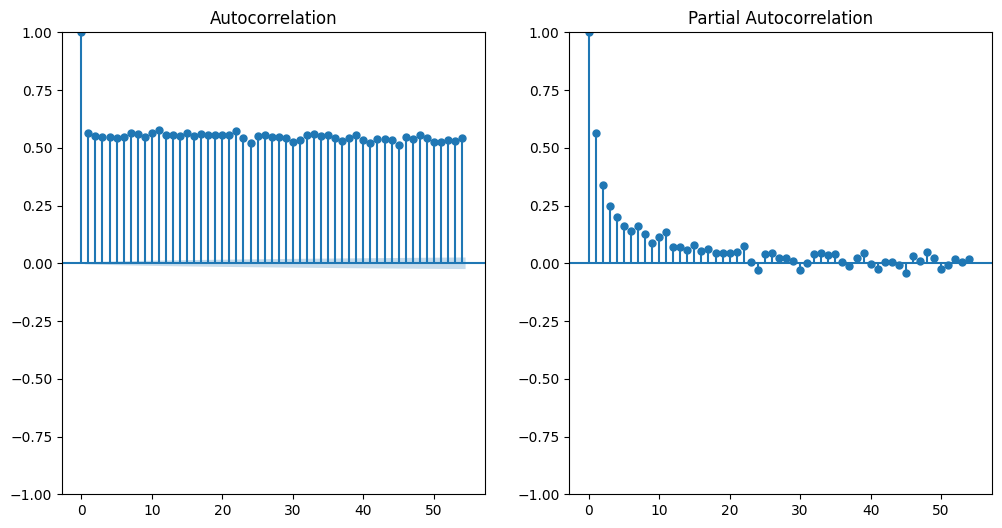

In [8]:
modelling.plot_correlation(time_series_data)

### **Supervised Learning Data:** 
Convert the time series data into a supervised learning problem using a sliding window.

In [9]:
supervised_data = modelling.create_supervised_data(time_series_data['Sales'], window_size=3)

2024-09-24 22:25:02,087 - INFO - Convert the time series data into a supervised learning


### **Scale the Data:**
Scale the features into the range (-1, 1) using MinMaxScaler.

In [10]:
scaled_data, scaler = modelling.scale_data(supervised_data)

2024-09-24 22:25:02,811 - INFO - scale the features


### **Build the LSTM Model:** 
Use TensorFlow/Keras to build and train an LSTM model.

In [11]:
# Prepare the data
X, y = modelling.prepare_data_for_lstm(scaled_data, window_size=3)
X_feature_matrix=X
# Reshape X for LSTM input: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

input_shape = (X.shape[1], X.shape[2])

lstm_model = modelling.build_lstm_model(input_shape)

# Train the LSTM model
lstm_model.fit(X, y, epochs=20, batch_size=32, verbose=1)

2024-09-24 22:25:03,217 - INFO - prepare data for LSTM


Epoch 1/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0226
Epoch 2/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0172
Epoch 3/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0170
Epoch 4/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0169
Epoch 5/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0166
Epoch 6/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0165
Epoch 7/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0167
Epoch 8/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0166
Epoch 9/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0166
Epoch 10/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0166
Epoch 11/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0162
Epoch 12/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0164
Epoch 13/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0160
Epoch 14/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0163
Epoch 15/20
625

### **Evaluate the Model:**
Measure the model’s performance using metrics like mean squared error (MSE).

In [12]:
modelling.evaluate_model(X_feature_matrix,y,lstm_model)

2024-09-24 22:30:25,462 - INFO - evaluate the model


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Mean Squared Error: 0.01583314109431563
Mean Absolute Error: 0.01583314109431563
R^2 Score: 0.538940654729378


### Serialize and save model
To serialize and save models with a timestamp, we can use the Python pickle library to save the model, and the datetime module to generate the required timestamp format (e.g., 10-08-2020-16-32-31-00.pkl).

In [13]:
modelling.save_model_with_timestamp(lstm_model,'LSTM_model')

2024-09-24 22:30:39,792 - INFO - Serializes and saves a trained model with a timestamp.


Model saved as models/LSTM_model-24-09-2024-22-30-39-00.pkl


'models/LSTM_model-24-09-2024-22-30-39-00.pkl'